# Introduction

## Final Project Submission

***
- Student Name: Adam Marianacci
- Student Pace: Flex
- Scheduled project review date/time: TBD
- Instructor Name: Mark Barbour

# Business Understanding

It is my job to help the WWFA (Water Wells For Africa) locate wells that need to be repaired in Tanzania.

# Data Understanding

# Data Preperation

In [1]:
# Importing the necessary libraries
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import folium
import statsmodels as sm
import sklearn
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Importing the dataframes
df_x = pd.read_csv('data/training_set_values.csv')
df_y = pd.read_csv('data/training_set_labels.csv')

In [4]:
# Combining the 2 dataframes into 1 new dataframe
Waterwells_df = pd.concat([df_y, df_x], axis=1)

In [5]:
# Previewing the dataframe
Waterwells_df.head()

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
Waterwells_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   id                     59400 non-null  int64  
 3   amount_tsh             59400 non-null  float64
 4   date_recorded          59400 non-null  object 
 5   funder                 55765 non-null  object 
 6   gps_height             59400 non-null  int64  
 7   installer              55745 non-null  object 
 8   longitude              59400 non-null  float64
 9   latitude               59400 non-null  float64
 10  wpt_name               59400 non-null  object 
 11  num_private            59400 non-null  int64  
 12  basin                  59400 non-null  object 
 13  subvillage             59029 non-null  object 
 14  region                 59400 non-null  object 
 15  re

In [7]:
Waterwells_df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

Dropping columns that are not directly related to the business problem and also have high cardinality, making them difficult to one hot encode.

In [8]:
# Dropping irrelevant columns from the dataframe, also columns with large amounts of missing data
columns_to_drop = [
    'id', 'scheme_management', 'region', 'region_code',
    'payment', 'public_meeting', 'district_code', 'population', 
    'num_private', 'basin', 'latitude', 'longitude',
    'waterpoint_type_group', 'source_class', 'payment_type', 'management_group', 'recorded_by', 
    'extraction_type', 'management', 
    'source_type', 'extraction_type_group', 'permit', 'funder',
    'date_recorded', 'installer', 'ward', 'scheme_name', 'wpt_name', 'lga', 'subvillage'
]

Waterwells_df = Waterwells_df.drop(columns_to_drop, axis=1, errors='ignore')


In [9]:
# Create a new column 'needs_repair' by merging the two categories
Waterwells_df['needs_repair'] = Waterwells_df['status_group'].replace(
    {'functional': 0, 'non functional': 1, 
     'functional needs repair': 1})

# Drop the original 'status_group' column
Waterwells_df.drop('status_group', axis=1, inplace=True)

#Display the updated DataFrame
Waterwells_df.head()



,amount_tsh,gps_height,construction_year,extraction_type_class,water_quality,quality_group,quantity,quantity_group,source,waterpoint_type,needs_repair
0,6000.0,1390,1999,gravity,soft,good,enough,enough,spring,communal standpipe,0
1,0.0,1399,2010,gravity,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe,0
2,25.0,686,2009,gravity,soft,good,enough,enough,dam,communal standpipe multiple,0
3,0.0,263,1986,submersible,soft,good,dry,dry,machine dbh,communal standpipe multiple,1
4,0.0,0,0,gravity,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe,0


In [10]:
#dropping the missing values from the 'construction_year' column and creating a new df
Construction_Year_df = Waterwells_df[Waterwells_df['construction_year'] != 0]

# Calculate the current year
current_year = datetime.now().year

# Create a new column 'age' by subtracting construction year from the current year
Construction_Year_df['age'] = current_year - Waterwells_df['construction_year']

In [11]:
Construction_Year_df['construction_year'].value_counts()

2010    2645
2008    2613
2009    2533
2000    2091
2007    1587
2006    1471
2003    1286
2011    1256
2004    1123
2012    1084
2002    1075
1978    1037
1995    1014
2005    1011
1999     979
1998     966
1990     954
1985     945
1996     811
1980     811
1984     779
1982     744
1994     738
1972     708
1974     676
1997     644
1992     640
1993     608
2001     540
1988     521
1983     488
1975     437
1986     434
1976     414
1970     411
1991     324
1989     316
1987     302
1981     238
1977     202
1979     192
1973     184
2013     176
1971     145
1960     102
1967      88
1963      85
1968      77
1969      59
1964      40
1962      30
1961      21
1965      19
1966      17
Name: construction_year, dtype: int64

In [12]:
# deleting the 'construction_year' column since we replaced it with an 'age' column
Construction_Year_df = Construction_Year_df.drop('construction_year', axis=1)

In [13]:
Construction_Year_df.head()

,amount_tsh,gps_height,extraction_type_class,water_quality,quality_group,quantity,quantity_group,source,waterpoint_type,needs_repair,age
0,6000.0,1390,gravity,soft,good,enough,enough,spring,communal standpipe,0,25
1,0.0,1399,gravity,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe,0,14
2,25.0,686,gravity,soft,good,enough,enough,dam,communal standpipe multiple,0,15
3,0.0,263,submersible,soft,good,dry,dry,machine dbh,communal standpipe multiple,1,38
5,20.0,0,submersible,salty,salty,enough,enough,other,communal standpipe multiple,0,15


In [14]:
# Defining X and y variables
y = Construction_Year_df["needs_repair"]
X = Construction_Year_df.drop("needs_repair", axis=1)

In [15]:
# Performing a train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
# Looking at the number of missing values in each column
X_train.isna().sum()

amount_tsh               0
gps_height               0
extraction_type_class    0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
waterpoint_type          0
age                      0
dtype: int64

In [17]:
# Create a list of all the categorical features
cols_to_transform = ['quantity_group', 'waterpoint_type','extraction_type_class',
                     'quality_group', 'source',
                     'water_quality', 'quantity']
# Create a dataframe with the new dummy columns created from the cols_to_transform list
X_train = pd.get_dummies(
    data=X_train, columns=cols_to_transform, drop_first=True, dtype=int)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 3488 to 24205
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   amount_tsh                                   30952 non-null  float64
 1   gps_height                                   30952 non-null  int64  
 2   age                                          30952 non-null  int64  
 3   quantity_group_enough                        30952 non-null  int64  
 4   quantity_group_insufficient                  30952 non-null  int64  
 5   quantity_group_seasonal                      30952 non-null  int64  
 6   quantity_group_unknown                       30952 non-null  int64  
 7   waterpoint_type_communal standpipe           30952 non-null  int64  
 8   waterpoint_type_communal standpipe multiple  30952 non-null  int64  
 9   waterpoint_type_dam                          30952 non-null  int64  


In [19]:
X_train.head()

,amount_tsh,gps_height,age,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
3488,0.0,1455,19,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
12678,200.0,229,17,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
37313,0.0,1588,14,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
20930,0.0,1466,17,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3639,2000.0,1542,34,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [20]:
# Defining the columns to scale
columns_to_scale = ['amount_tsh', 'gps_height']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns and transform the data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [21]:
# Inspecting the data to make sure it was scaled
X_train.head()

,amount_tsh,gps_height,age,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
3488,0.000000,0.535828,19,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
12678,0.000571,0.103071,17,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
37313,0.000000,0.582774,14,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
20930,0.000000,0.539711,17,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3639,0.005714,0.566537,34,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


# Modeling

In [22]:
# Building a logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

The classifier was about 74% accurate on the training data.

In [23]:
# Checking the performance on the training data
y_hat_train = logreg.predict(X_train)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    23043
1     7909
Name: Residuals (counts), dtype: int64

0    0.744475
1    0.255525
Name: Residuals (proportions), dtype: float64


In [24]:
# Looking at the number of missing values in each column
X_test.isna().sum()

amount_tsh               0
gps_height               0
extraction_type_class    0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
waterpoint_type          0
age                      0
dtype: int64

In [25]:
# Create a list of all the categorical features
cols_to_transform = ['quantity_group', 'waterpoint_type','extraction_type_class',
                     'quality_group', 'source',
                     'water_quality', 'quantity']
# Create a dataframe with the new dummy columns created from the cols_to_transform list
X_test = pd.get_dummies(
    data=X_test, columns=cols_to_transform, drop_first=True, dtype=int)

In [26]:
# Fit the scaler on the specified columns and transform the data
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

In [27]:
logreg.score(X_test, y_test)

0.7411810311409743

We are still about 74% accuarate on our test data.

In [28]:
y_hat_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    5736
1    2003
Name: Residuals (counts), dtype: int64

0    0.741181
1    0.258819
Name: Residuals (proportions), dtype: float64


In [62]:
cvscore = cross_val_score(logreg, X_train, y_train.values, cv=10)

In [63]:
cvscore

array([0.74224806, 0.75      , 0.74378029, 0.72504039, 0.74184168,
       0.75250404, 0.74378029, 0.74442649, 0.75056543, 0.74733441])

In [31]:
np.average(cvscore)

0.744152108301712

In [32]:
np.std(cvscore)

0.007278622228509776

Building a single decision tree

In [33]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
y_pred = clf.predict(X_test)

Our True/positives are 3,137 and True/negatives are 2,263. Our False/positives are 1,200 and False/negatives are 1,139

In [ ]:
# plot this

In [36]:
print(confusion_matrix(y_test, y_pred))

[[3137 1200]
 [1139 2263]]


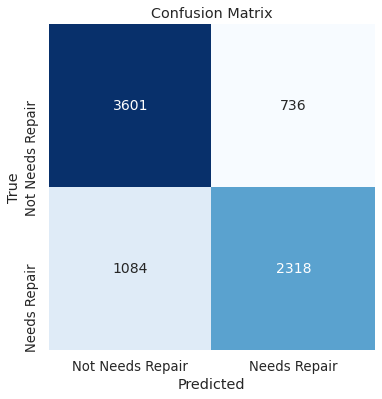

In [72]:
# Assuming you have your predicted labels and true labels
# Replace 'y_true' and 'y_pred' with your actual data
# Example:
# y_true = true labels
# y_pred = predicted labels

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up a figure and axis
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, square=True,
            xticklabels=['Not Needs Repair', 'Needs Repair'],
            yticklabels=['Not Needs Repair', 'Needs Repair'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      4337
           1       0.65      0.67      0.66      3402

    accuracy                           0.70      7739
   macro avg       0.69      0.69      0.69      7739
weighted avg       0.70      0.70      0.70      7739



In [38]:
clf.feature_importances_

array([6.44606228e-02, 4.33946369e-01, 1.64575100e-01, 1.15266243e-03,
       2.14760593e-02, 4.29570233e-02, 0.00000000e+00, 1.93255291e-02,
       1.47102957e-02, 1.52198979e-04, 2.78267676e-03, 1.51764449e-03,
       7.75907251e-02, 4.49617947e-03, 4.68342453e-03, 1.00250394e-02,
       3.16025880e-03, 1.43828181e-02, 3.68753877e-04, 8.95082559e-04,
       4.54888379e-03, 1.17389288e-04, 3.91711563e-03, 1.79236355e-03,
       1.65016881e-03, 7.04715840e-04, 1.32904852e-02, 1.61535938e-03,
       5.11550242e-03, 1.02908962e-02, 7.09860264e-03, 1.44432275e-02,
       2.54675229e-04, 4.65021513e-04, 1.20712633e-04, 1.11532330e-04,
       3.42546485e-03, 1.23775613e-03, 3.71896927e-03, 8.75723924e-04,
       3.81099497e-02, 6.31434054e-04, 1.08522186e-04, 3.69706412e-03])

In [39]:
print("clf.feature_importances_:", clf.feature_importances_)
print("X.columns:", X_train.columns)

clf.feature_importances_: [6.44606228e-02 4.33946369e-01 1.64575100e-01 1.15266243e-03
 2.14760593e-02 4.29570233e-02 0.00000000e+00 1.93255291e-02
 1.47102957e-02 1.52198979e-04 2.78267676e-03 1.51764449e-03
 7.75907251e-02 4.49617947e-03 4.68342453e-03 1.00250394e-02
 3.16025880e-03 1.43828181e-02 3.68753877e-04 8.95082559e-04
 4.54888379e-03 1.17389288e-04 3.91711563e-03 1.79236355e-03
 1.65016881e-03 7.04715840e-04 1.32904852e-02 1.61535938e-03
 5.11550242e-03 1.02908962e-02 7.09860264e-03 1.44432275e-02
 2.54675229e-04 4.65021513e-04 1.20712633e-04 1.11532330e-04
 3.42546485e-03 1.23775613e-03 3.71896927e-03 8.75723924e-04
 3.81099497e-02 6.31434054e-04 1.08522186e-04 3.69706412e-03]
X.columns: Index(['amount_tsh', 'gps_height', 'age', 'quantity_group_enough',
       'quantity_group_insufficient', 'quantity_group_seasonal',
       'quantity_group_unknown', 'waterpoint_type_communal standpipe',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'wat

In [40]:
features = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importance'])
print(features)

                                             Importance
amount_tsh                                     0.064461
gps_height                                     0.433946
age                                            0.164575
quantity_group_enough                          0.001153
quantity_group_insufficient                    0.021476
quantity_group_seasonal                        0.042957
quantity_group_unknown                         0.000000
waterpoint_type_communal standpipe             0.019326
waterpoint_type_communal standpipe multiple    0.014710
waterpoint_type_dam                            0.000152
waterpoint_type_hand pump                      0.002783
waterpoint_type_improved spring                0.001518
waterpoint_type_other                          0.077591
extraction_type_class_handpump                 0.004496
extraction_type_class_motorpump                0.004683
extraction_type_class_other                    0.010025
extraction_type_class_rope pump                0

Building a Random Forest Model

In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = rf.predict(X_test)

In [44]:
rf.score(X_test, y_test)

0.7648274970926476

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4337
           1       0.76      0.68      0.72      3402

    accuracy                           0.76      7739
   macro avg       0.76      0.76      0.76      7739
weighted avg       0.76      0.76      0.76      7739



In [55]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)
print(features)

                                                    0
amount_tsh                                   0.090631
gps_height                                   0.399178
age                                          0.199064
quantity_group_enough                        0.022722
quantity_group_insufficient                  0.016021
quantity_group_seasonal                      0.011426
quantity_group_unknown                       0.001423
waterpoint_type_communal standpipe           0.021078
waterpoint_type_communal standpipe multiple  0.012820
waterpoint_type_dam                          0.000123
waterpoint_type_hand pump                    0.006481
waterpoint_type_improved spring              0.002182
waterpoint_type_other                        0.040611
extraction_type_class_handpump               0.007965
extraction_type_class_motorpump              0.004570
extraction_type_class_other                  0.027861
extraction_type_class_rope pump              0.001842
extraction_type_class_submer

In [ ]:
# histogram of gps_height

In [65]:
# Sorting the features by most influential to least
features_sorted = features.sort_values(by=0, ascending=False)
print(features_sorted)

                                                    0
gps_height                                   0.399178
age                                          0.199064
amount_tsh                                   0.090631
waterpoint_type_other                        0.040611
extraction_type_class_other                  0.027861
quantity_enough                              0.025583
quantity_group_enough                        0.022722
waterpoint_type_communal standpipe           0.021078
quantity_group_insufficient                  0.016021
quantity_insufficient                        0.013829
waterpoint_type_communal standpipe multiple  0.012820
quantity_seasonal                            0.012652
quantity_group_seasonal                      0.011426
source_spring                                0.011148
source_machine dbh                           0.009284
extraction_type_class_submersible            0.008589
extraction_type_class_handpump               0.007965
source_river                

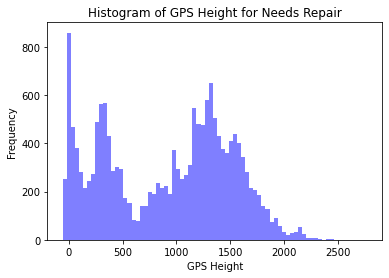

In [71]:
# Filtering the data based on 'needs_repair'
needs_repair_histogram = Construction_Year_df[Construction_Year_df['needs_repair'] == 1]['gps_height']

#plotting a histogram
plt.hist(needs_repair_histogram, bins=75, color='blue', alpha=0.5)
plt.xlabel('GPS Height')
plt.ylabel('Frequency')
plt.title('Histogram of GPS Height for Needs Repair')
plt.show()

Building a third model with hyperparameters

In [49]:
rf2 = RandomForestClassifier(n_estimators = 1000,
                            criterion = 'entropy',
                            min_samples_split = 10,
                            max_depth = 15,
                            random_state = 42
)

In [50]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [51]:
rf2.score(X_test, y_test)

0.7805918077270966

In [52]:
y_pred2 = rf2.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      4337
           1       0.83      0.63      0.72      3402

    accuracy                           0.78      7739
   macro avg       0.79      0.76      0.77      7739
weighted avg       0.79      0.78      0.77      7739



# Evaluation

# Conclusion

# Recommendations

# Limitations

# Next Steps